# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
#Colab Link - https://colab.research.google.com/drive/1sk8sfBrRFu35T0auEbvPPm76iaX5kWCu?usp=sharing

In [3]:
%matplotlib inline

# 2. Load Data

In [4]:
# train_data = pd.read_csv('/content/drive/MyDrive/datastorm/train_kaggle.csv')
# test_data = pd.read_csv('/content/drive/MyDrive/datastorm/test_kaggle.csv')

In [5]:
train_data = pd.read_csv('train_kaggle.csv')
test_data = pd.read_csv('test_kaggle.csv')

C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\4152172739.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_kaggle.csv')


In [6]:
# Display first few rows of the datasets
print("Train Data:")
train_data.head()

Train Data:


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [7]:
print("Test Data:")
test_data.head()

Test Data:


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24


# 3. Data preprocessing

In [8]:
# Correct the typo in column name
train_data.rename(columns={'cluster_catgeory': 'cluster_category'}, inplace=True)

## 3.1 Handling missing values and Converting text to numeric values

In [9]:
# Convert 'null' strings to NaN
train_data.replace('null', np.nan, inplace=True)
test_data.replace('null', np.nan, inplace=True)
train_data.replace('nul', np.nan, inplace=True)
test_data.replace('nul', np.nan, inplace=True)

In [10]:
# Check for missing values in train and test data
print("Missing values in train data:")
print(train_data.isnull().sum())
print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in train data:
Customer_ID          2
outlet_city          2
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_category     1
dtype: int64

Missing values in test data:
Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [11]:
# Total number of rows in the train dataset
total_rows_train = train_data.shape[0]

# Percentage of missing values in each column of train data
missing_percentage_train = (train_data.isnull().sum() / total_rows_train) * 100

print("Percentage of missing values in train data:")
print(missing_percentage_train)


Percentage of missing values in train data:
Customer_ID         0.000258
outlet_city         0.000258
luxury_sales        0.004909
fresh_sales         0.005813
dry_sales           0.004779
cluster_category    0.000129
dtype: float64


In [12]:
# Drop rows with missing 'outlet_city' and 'cluster_category'
train_data.dropna(subset=['outlet_city','cluster_category'], inplace=True)


In [13]:
# Check for missing values in train data
print("Missing values in train data:")
print(train_data.isnull().sum())


Missing values in train data:
Customer_ID          2
outlet_city          0
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_category     0
dtype: int64


In [14]:
non_numeric_rows_luxury = train_data[pd.to_numeric(train_data['luxury_sales'], errors='coerce').isna()]
non_numeric_rows_fresh = train_data[pd.to_numeric(train_data['fresh_sales'], errors='coerce').isna()]
non_numeric_rows_dry = train_data[pd.to_numeric(train_data['dry_sales'], errors='coerce').isna()]

#Get the count of non-numeric rows
count_luxury = len(non_numeric_rows_luxury)
count_fresh = len(non_numeric_rows_fresh)
count_dry = len(non_numeric_rows_dry)

print(f"The number of rows with non-numeric values in 'luxury_sales' column in train_data is: {count_luxury}")
print(f"The number of rows with non-numeric values in 'fresh_sales' column in train_data is: {count_fresh}")
print(f"The number of rows with non-numeric values in 'dry_sales' column in train_data is: {count_dry}")


The number of rows with non-numeric values in 'luxury_sales' column in train_data is: 45
The number of rows with non-numeric values in 'fresh_sales' column in train_data is: 50
The number of rows with non-numeric values in 'dry_sales' column in train_data is: 38


In [15]:
non_numeric_rows_luxury = test_data[pd.to_numeric(test_data['luxury_sales'], errors='coerce').isna()]
non_numeric_rows_fresh = test_data[pd.to_numeric(test_data['fresh_sales'], errors='coerce').isna()]
non_numeric_rows_dry = test_data[pd.to_numeric(test_data['dry_sales'], errors='coerce').isna()]

# Get the count of non-numeric rows
count_luxury = len(non_numeric_rows_luxury)
count_fresh = len(non_numeric_rows_fresh)
count_dry = len(non_numeric_rows_dry)

print(f"The number of rows with non-numeric values in 'luxury_sales' column in test_data is: {count_luxury}")
print(f"The number of rows with non-numeric values in 'fresh_sales' column in test_data is: {count_fresh}")
print(f"The number of rows with non-numeric values in 'dry_sales' column in test_data is: {count_dry}")

The number of rows with non-numeric values in 'luxury_sales' column in test_data is: 2
The number of rows with non-numeric values in 'fresh_sales' column in test_data is: 1
The number of rows with non-numeric values in 'dry_sales' column in test_data is: 1


In [16]:
def text_to_number(input):
    #if input is already a number return
    try:
        return float(input)
    except ValueError:
        pass


    # Define the mapping dictionary
    mapping_dict = {
        'one thousand four hundread ruppes': 1400,
        'eight hundread ruppess': 800,
        'six hundread and hirty': 630,
        'thousand tow hundread': 1200,
        'seven hundread and nine ruppees': 709,
        'three thousand two hundread ruppess': 3200,
        'four thousand one hundread ruppess': 4100,
        'six hundread and five ruppes': 605,
        'three thousana and five hundread': 3500,
        'thirteen thousand ruppes': 13000,
        'five thousand ruppes': 5000,
        'two thousand seven hundread ruppess': 2700,
        'four thousand and two hundread ruppes': 4200,
        'seven hundread and sixty ruppees': 760,
        'eight hundread and fifteen ruppes': 815,
        'nine thousand ruppess': 9000,
        'three thousand seven hundread ruppees': 3700
    }

    # Trim text and convert to lowercase
    cleaned_text = input.strip().lower()

    # Look up the corresponding number in the mapping dictionary
    return mapping_dict.get(cleaned_text, None)

In [17]:
# Get the rows containing strings in the sales columns
text_rows_luxury = train_data[pd.to_numeric(train_data['luxury_sales'], errors='coerce').isna()]
text_rows_fresh = train_data[pd.to_numeric(train_data['fresh_sales'], errors='coerce').isna()]
text_rows_dry = train_data[pd.to_numeric(train_data['dry_sales'], errors='coerce').isna()]


# Apply the conversion function only to the rows containing strings
text_rows_luxury['luxury_sales'] = text_rows_luxury['luxury_sales'].apply(lambda x: text_to_number(str(x)))
text_rows_fresh['fresh_sales'] = text_rows_fresh['fresh_sales'].apply(lambda x: text_to_number(str(x)))
text_rows_dry['dry_sales'] = text_rows_dry['dry_sales'].apply(lambda x: text_to_number(str(x)))

# Update the original DataFrame with the converted values
train_data.update(text_rows_luxury)
train_data.update(text_rows_fresh)
train_data.update(text_rows_dry)


C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\2809564284.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rows_luxury['luxury_sales'] = text_rows_luxury['luxury_sales'].apply(lambda x: text_to_number(str(x)))
C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\2809564284.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rows_fresh['fresh_sales'] = text_rows_fresh['fresh_sales'].apply(lambda x: text_to_number(str(x)))
C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\2809564284.py:1

In [18]:
non_numeric_rows_luxury = train_data[pd.to_numeric(train_data['luxury_sales'], errors='coerce').isna()]
non_numeric_rows_fresh = train_data[pd.to_numeric(train_data['fresh_sales'], errors='coerce').isna()]
non_numeric_rows_dry = train_data[pd.to_numeric(train_data['dry_sales'], errors='coerce').isna()]

# Get the count of non-numeric rows
count_luxury = len(non_numeric_rows_luxury)
count_fresh = len(non_numeric_rows_fresh)
count_dry = len(non_numeric_rows_dry)

print(f"The number of rows with non-numeric values in 'luxury_sales' column in train_data is: {count_luxury}")
print(f"The number of rows with non-numeric values in 'fresh_sales' column in train_data is: {count_fresh}")
print(f"The number of rows with non-numeric values in 'dry_sales' column in train_data is: {count_dry}")


The number of rows with non-numeric values in 'luxury_sales' column in train_data is: 38
The number of rows with non-numeric values in 'fresh_sales' column in train_data is: 45
The number of rows with non-numeric values in 'dry_sales' column in train_data is: 37


In [19]:
train_data['luxury_sales'] = pd.to_numeric(train_data['luxury_sales'], errors='coerce')
train_data['fresh_sales'] = pd.to_numeric(train_data['fresh_sales'], errors='coerce')
train_data['dry_sales'] = pd.to_numeric(train_data['dry_sales'], errors='coerce')

# Calculate mean values for each combination of cluster category and outlet area
mean_sales_by_group = train_data.groupby(['cluster_category', 'outlet_city']).agg({'luxury_sales': 'mean', 'fresh_sales': 'mean', 'dry_sales': 'mean'})

# Define a function to impute missing values based on cluster category and outlet area mean
def impute_missing(row):
    if pd.isnull(row['luxury_sales']):
        row['luxury_sales'] = mean_sales_by_group.loc[(row['cluster_category'], row['outlet_city']), 'luxury_sales']
    if pd.isnull(row['fresh_sales']):
        row['fresh_sales'] = mean_sales_by_group.loc[(row['cluster_category'], row['outlet_city']), 'fresh_sales']
    if pd.isnull(row['dry_sales']):
        row['dry_sales'] = mean_sales_by_group.loc[(row['cluster_category'], row['outlet_city']), 'dry_sales']
    return row

# Apply the function to impute missing values
train_data = train_data.apply(impute_missing, axis=1)

Text(0, 0.5, 'Count')

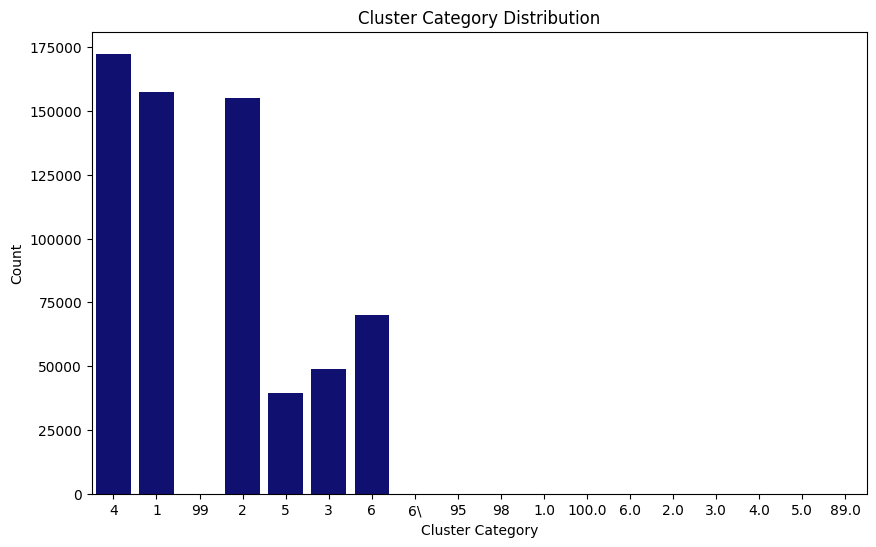

In [20]:
# Plot distribution for the entire DataFrame
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='cluster_category', data=train_data, color='navy', saturation=0.75)
ax.set_title('Cluster Category Distribution')
ax.set_xlabel('Cluster Category')
ax.set_ylabel('Count')

In [21]:
# Check for missing values in train data
print("Missing values in train data:")
print(train_data.isnull().sum())

Missing values in train data:
Customer_ID         2
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    0
dtype: int64


In [22]:
#check cluster category values
print("Data type of cluster_category:", train_data['cluster_category'].dtype)
print("Unique values in cluster_category:", train_data['cluster_category'].unique())

Data type of cluster_category: object
Unique values in cluster_category: ['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 100.0 89.0]


In [23]:
# Remove faulty values from the target variable
train_data['cluster_category'] = train_data['cluster_category'].replace({89.0: np.nan,98: np.nan, 100.0: np.nan, '99': np.nan, 95:np.nan})
# Replace string values with their integer counterparts
replace_values = {'4': 4, '6': 6, '5': 5, '1': 1, '3': 3, '2': 2, '6\\':6}
train_data['cluster_category'] = train_data['cluster_category'].replace(replace_values)

# Drop rows with NaN values in the target variable
train_data.dropna(subset=['cluster_category'], inplace=True)

# Convert the target variable to integers
train_data['cluster_category'] = train_data['cluster_category'].astype(int)


C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\995152182.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['cluster_category'] = train_data['cluster_category'].replace(replace_values)


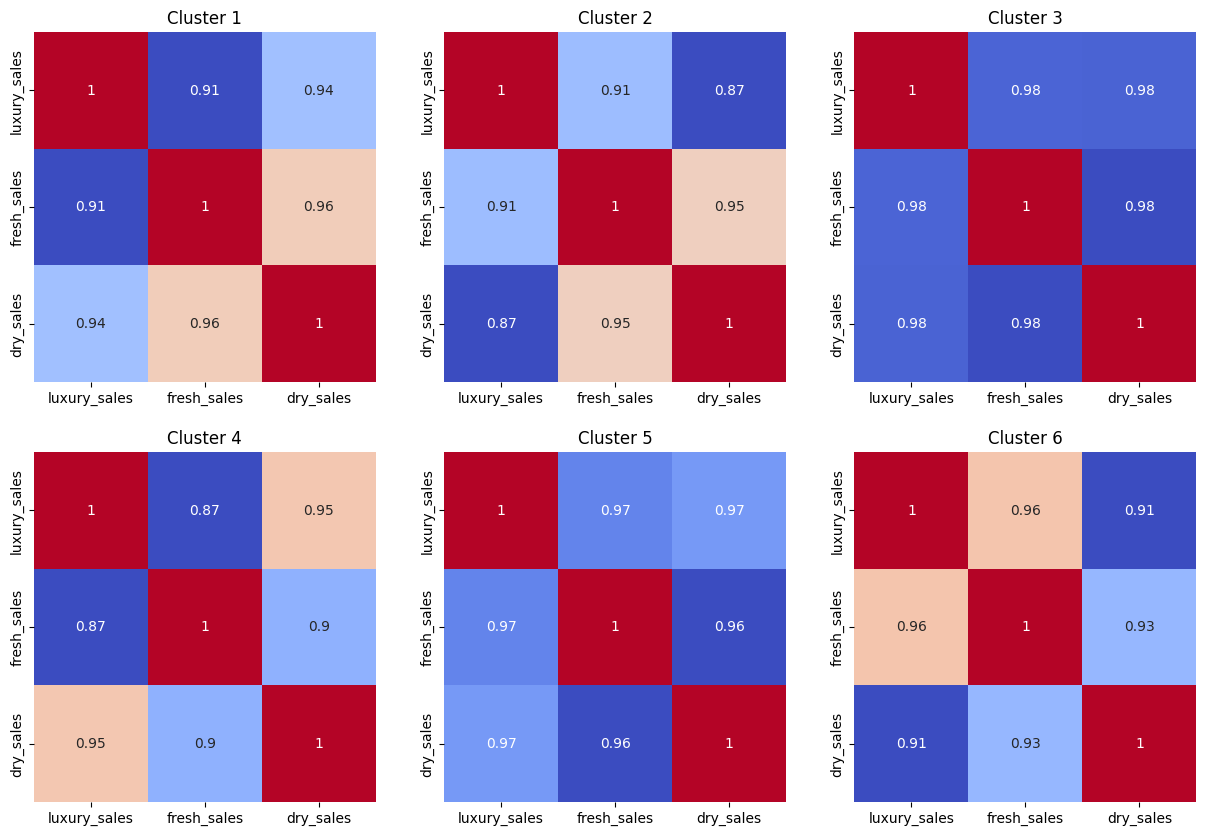

In [24]:
plt.figure(figsize=(15, 10))
#get correlation for each cluster
for i in range (1,7):
    cluster = train_data[train_data['cluster_category'] == i]
    corr = cluster[['luxury_sales', 'fresh_sales', 'dry_sales']].corr()
    plt.subplot(2, 3, i)
    sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=False)
    plt.title(f'Cluster {i}')

In [25]:
# Get the rows containing strings in the sales columns
text_rows_luxury = test_data[pd.to_numeric(test_data['luxury_sales'], errors='coerce').isna()]
text_rows_fresh = test_data[pd.to_numeric(test_data['fresh_sales'], errors='coerce').isna()]
text_rows_dry = test_data[pd.to_numeric(test_data['dry_sales'], errors='coerce').isna()]

# Apply the conversion function only to the rows containing strings
text_rows_luxury['luxury_sales'] = text_rows_luxury['luxury_sales'].apply(lambda x: text_to_number(str(x)))
text_rows_fresh['fresh_sales'] = text_rows_fresh['fresh_sales'].apply(lambda x: text_to_number(str(x)))
text_rows_dry['dry_sales'] = text_rows_dry['dry_sales'].apply(lambda x: text_to_number(str(x)))

# Update the original DataFrame with the converted values
test_data.update(text_rows_luxury)
test_data.update(text_rows_fresh)
test_data.update(text_rows_dry)

C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\3380221461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rows_luxury['luxury_sales'] = text_rows_luxury['luxury_sales'].apply(lambda x: text_to_number(str(x)))
C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\3380221461.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rows_fresh['fresh_sales'] = text_rows_fresh['fresh_sales'].apply(lambda x: text_to_number(str(x)))
C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\3380221461.py:9

In [26]:
non_numeric_rows_luxury = test_data[pd.to_numeric(test_data['luxury_sales'], errors='coerce').isna()]
non_numeric_rows_fresh = test_data[pd.to_numeric(test_data['fresh_sales'], errors='coerce').isna()]
non_numeric_rows_dry = test_data[pd.to_numeric(test_data['dry_sales'], errors='coerce').isna()]

# Get the count of non-numeric rows
count_luxury = len(non_numeric_rows_luxury)
count_fresh = len(non_numeric_rows_fresh)
count_dry = len(non_numeric_rows_dry)

print(f"The number of rows with non-numeric values in 'luxury_sales' column in test_data is: {count_luxury}")
print(f"The number of rows with non-numeric values in 'fresh_sales' column in test_data is: {count_fresh}")
print(f"The number of rows with non-numeric values in 'dry_sales' column in test_data is: {count_dry}")

The number of rows with non-numeric values in 'luxury_sales' column in test_data is: 0
The number of rows with non-numeric values in 'fresh_sales' column in test_data is: 0
The number of rows with non-numeric values in 'dry_sales' column in test_data is: 0


In [27]:
test_data['luxury_sales'] = pd.to_numeric(test_data['luxury_sales'], errors='coerce')
test_data['fresh_sales'] = pd.to_numeric(test_data['fresh_sales'], errors='coerce')
test_data['dry_sales'] = pd.to_numeric(test_data['dry_sales'], errors='coerce')


## 3.2 Encoding categorical variables and Scaling features

In [28]:
# Convert outlet_city column values to lower case
train_data['outlet_city'] = train_data['outlet_city'].str.lower()

# Replace 'trincomale' with 'trincomalee'
train_data['outlet_city'] = train_data['outlet_city'].replace('trincomale', 'trincomalee')

# Convert outlet_city column values to lower case
test_data['outlet_city'] = test_data['outlet_city'].str.lower()

# Replace 'trincomale' with 'trincomalee'
test_data['outlet_city'] = test_data['outlet_city'].replace('trincomale', 'trincomalee')


In [29]:
print(train_data["outlet_city"].unique())
print(test_data["outlet_city"].unique())

['kelaniya' 'moratuwa' 'wattala' 'homagama' 'dehiwala-mount lavinia'
 'panadura' 'kaduwela' 'peliyagoda' 'kotte' 'nuwara eliya' 'batticaloa'
 'colombo' 'jaffna' 'gampaha' 'kalmunai' 'galle' 'katunayake' 'negombo'
 'trincomalee' 'kandy']
['batticaloa' 'colombo' 'dehiwala-mount lavinia' 'anuradhapura' 'galle'
 'gampaha' 'homagama' 'jaffna' 'kaduwela' 'kalmunai' 'kandy' 'katunayake'
 'kelaniya' 'madawachiya' 'kotte' 'moratuwa' 'negombo' 'nuwara eliya'
 'panadura' 'peliyagoda' 'trincomalee' 'wattala']


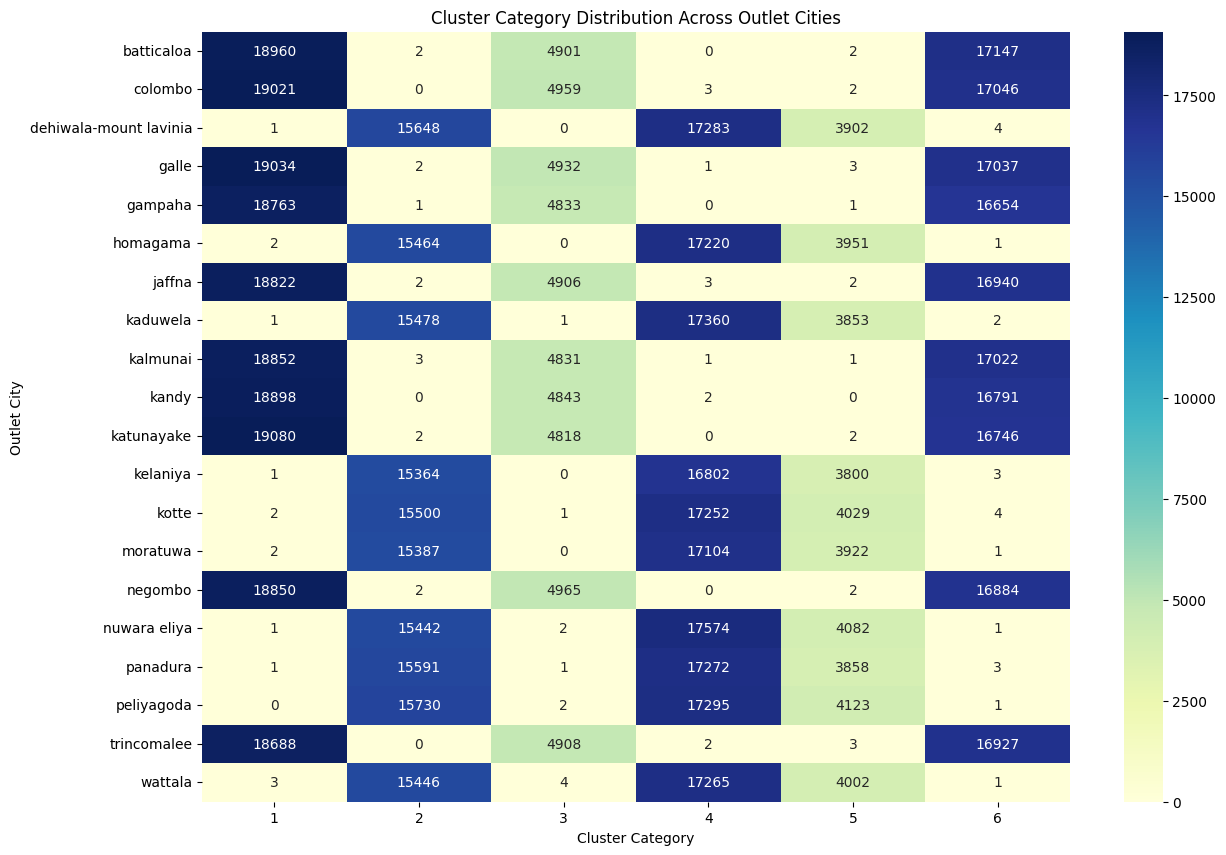

In [30]:
# Count the occurrences of each cluster category for each outlet city
pivot_table = train_data.pivot_table(index='outlet_city', columns='cluster_category', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))

# Create a heatmap
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')

# Adjust plot aesthetics
plt.title('Cluster Category Distribution Across Outlet Cities')
plt.xlabel('Cluster Category')
plt.ylabel('Outlet City')

plt.show()

In [31]:
def categorize_outlet_city(row):
    # Define the patterns
    pattern_0 = {2, 4, 5}
    pattern_1 = {1, 3, 6}

    # Get the three most common cluster categories
    top_clusters = set(row.nlargest(3).index)

    # Check if the top clusters match either of the patterns
    if top_clusters == pattern_0:
        return 'outlet_cat_1'
    elif top_clusters == pattern_1:
        return 'outlet_cat_2'
    else:
        return np.nan  # Return NaN for cities that don't match either pattern

# Apply the function to the DataFrame
pivot_table['outlet_city_category'] = pivot_table.apply(categorize_outlet_city, axis=1)
pivot_table.head(30)

cluster_category,1,2,3,4,5,6,outlet_city_category
outlet_city,,,,,,,
batticaloa,18960,2,4901,0,2,17147,outlet_cat_2
colombo,19021,0,4959,3,2,17046,outlet_cat_2
dehiwala-mount lavinia,1,15648,0,17283,3902,4,outlet_cat_1
galle,19034,2,4932,1,3,17037,outlet_cat_2
gampaha,18763,1,4833,0,1,16654,outlet_cat_2
homagama,2,15464,0,17220,3951,1,outlet_cat_1
jaffna,18822,2,4906,3,2,16940,outlet_cat_2
kaduwela,1,15478,1,17360,3853,2,outlet_cat_1
kalmunai,18852,3,4831,1,1,17022,outlet_cat_2


In [32]:
pivot_table.head(30)

cluster_category,1,2,3,4,5,6,outlet_city_category
outlet_city,,,,,,,
batticaloa,18960,2,4901,0,2,17147,outlet_cat_2
colombo,19021,0,4959,3,2,17046,outlet_cat_2
dehiwala-mount lavinia,1,15648,0,17283,3902,4,outlet_cat_1
galle,19034,2,4932,1,3,17037,outlet_cat_2
gampaha,18763,1,4833,0,1,16654,outlet_cat_2
homagama,2,15464,0,17220,3951,1,outlet_cat_1
jaffna,18822,2,4906,3,2,16940,outlet_cat_2
kaduwela,1,15478,1,17360,3853,2,outlet_cat_1
kalmunai,18852,3,4831,1,1,17022,outlet_cat_2


In [33]:
# Create a dictionary to map outlet cities to their categories
city_category_mapping = pivot_table['outlet_city_category'].to_dict()

# Add the 'outlet_city_category' column to the original DataFrame
train_data['outlet_city'] = train_data['outlet_city'].map(city_category_mapping)

# Display the updated DataFrame
train_data.head(10)

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,outlet_cat_1,1209.60,756.00,5292.00,4
1,10178643.0,outlet_cat_1,1590.12,1060.08,6007.12,1
2,10513916.0,outlet_cat_1,2288.88,1481.04,9155.52,4
3,10334589.0,outlet_cat_1,2274.94,1739.66,9099.76,4
4,10458365.0,outlet_cat_1,2345.49,2069.55,9243.99,4
5,10654823.0,outlet_cat_1,1661.00,913.55,5564.35,4
6,10603456.0,outlet_cat_1,1544.96,908.80,6270.72,4
7,10382219.0,outlet_cat_1,2120.96,1325.60,9279.20,4
8,10473125.0,outlet_cat_1,1092.80,1024.50,4644.40,4
9,10751172.0,outlet_cat_1,2390.20,1673.14,7887.66,4


In [34]:
# Add the 'outlet_city_category' column to the original DataFrame
test_data['outlet_city_category'] = test_data['outlet_city'].map(city_category_mapping)

# Display the updated DataFrame
test_data.head(10)

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,outlet_city_category
0,33574,batticaloa,2686.50,3582.00,12537.00,outlet_cat_2
1,10089,batticaloa,1717.56,2576.34,9446.58,outlet_cat_2
2,38329,batticaloa,854.04,1242.24,5201.88,outlet_cat_2
3,11376,batticaloa,1638.12,2320.67,9282.68,outlet_cat_2
4,12410,batticaloa,1039.09,1518.67,5435.24,outlet_cat_2
5,826,batticaloa,1295.84,1495.20,6877.92,outlet_cat_2
6,10364,batticaloa,760.00,914.40,3352.80,outlet_cat_2
7,39986,batticaloa,2019.64,2452.42,9953.94,outlet_cat_2
8,11133,batticaloa,1789.92,3091.68,10739.52,outlet_cat_2
9,32747,batticaloa,2022.54,2489.28,10268.28,outlet_cat_2


In [35]:
print("\nMissing values in test data:")
print(test_data['outlet_city_category'].isnull().sum())


Missing values in test data:
3144


In [36]:
from scipy.spatial.distance import euclidean

# Calculate Mean Sales Values for Existing Outlet Areas in Training Data
existing_outlet_areas = train_data.groupby('outlet_city').agg({
    'luxury_sales': 'mean',
    'fresh_sales': 'mean',
    'dry_sales': 'mean'
}).reset_index()

# Identify cities with missing outlet_city_category
missing_categories_cities = test_data[test_data['outlet_city_category'].isnull()]['outlet_city'].unique()

# Calculate mean sales values for each outlet area in the test data
mean_sales_test = test_data.groupby('outlet_city').agg({'luxury_sales': 'mean', 'fresh_sales': 'mean', 'dry_sales': 'mean'})

# Get the mean sales values for the new outlet areas
new_outlet_areas = {}
for city in missing_categories_cities:
    new_outlet_areas[city] = mean_sales_test.loc[city]

similar_areas = {}
for new_area, new_sales in new_outlet_areas.items():
    distances = {}
    for index, row in existing_outlet_areas.iterrows():
        existing_sales = row[['luxury_sales', 'fresh_sales', 'dry_sales']]
        distance = euclidean(existing_sales, [new_sales['luxury_sales'], new_sales['fresh_sales'], new_sales['dry_sales']])
        distances[row['outlet_city']] = distance
    similar_areas[new_area] = min(distances, key=distances.get)

# Map New Outlet Areas to Most Similar Existing Outlet Areas
for new_area, similar_area in similar_areas.items():
    print(f"New Outlet Area '{new_area}' is similar to Existing Outlet Area Category '{similar_area}'")


New Outlet Area 'anuradhapura' is similar to Existing Outlet Area Category 'outlet_cat_2'
New Outlet Area 'madawachiya' is similar to Existing Outlet Area Category 'outlet_cat_1'


In [37]:
# Identify cities with missing outlet_city_category
missing_categories_cities = test_data[test_data['outlet_city_category'].isnull()]['outlet_city'].unique()

# Loop through missing categories cities
for city in missing_categories_cities:
    # Filter test_data for the current city
    city_data = test_data[test_data['outlet_city'] == city]

    # Map outlet city category to the current city
    city_data['outlet_city_category'] = similar_areas.get(city)

    # Update the test_data DataFrame with the mapped outlet city category for the current city
    test_data.update(city_data)

# Display the updated DataFrame
test_data.head()

C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\1359762340.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['outlet_city_category'] = similar_areas.get(city)
C:\Users\Anushanga\AppData\Local\Temp\ipykernel_9324\1359762340.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['outlet_city_category'] = similar_areas.get(city)


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,outlet_city_category
0,33574,batticaloa,2686.50,3582.00,12537.00,outlet_cat_2
1,10089,batticaloa,1717.56,2576.34,9446.58,outlet_cat_2
2,38329,batticaloa,854.04,1242.24,5201.88,outlet_cat_2
3,11376,batticaloa,1638.12,2320.67,9282.68,outlet_cat_2
4,12410,batticaloa,1039.09,1518.67,5435.24,outlet_cat_2


In [38]:
print("\nMissing values in test data:")
print(test_data['outlet_city_category'].isnull().sum())


Missing values in test data:
0


In [39]:
test_data['outlet_city'] = test_data['outlet_city_category']
test_data = test_data.drop('outlet_city_category',axis=1)
test_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,outlet_cat_2,2686.50,3582.00,12537.00
1,10089,outlet_cat_2,1717.56,2576.34,9446.58
2,38329,outlet_cat_2,854.04,1242.24,5201.88
3,11376,outlet_cat_2,1638.12,2320.67,9282.68
4,12410,outlet_cat_2,1039.09,1518.67,5435.24


Summary Statistics:
        Customer_ID   luxury_sales    fresh_sales      dry_sales  \
count  7.741450e+05  774147.000000  774147.000000  774147.000000   
mean   1.038708e+07    1921.991495    4428.681767    4676.264467   
std    2.234798e+05    1004.091840    3334.633841    3409.358707   
min    1.000000e+07     500.000000     500.000000     500.000000   
25%    1.019354e+07    1213.550000    1620.190000    1787.940000   
50%    1.038708e+07    1715.300000    3356.540000    3727.760000   
75%    1.058062e+07    2338.700000    6671.655000    7162.200000   
max    1.077415e+07    6999.650000   13997.900000   13999.300000   

       cluster_category  
count     774147.000000  
mean           3.292110  
std            1.867013  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            5.000000  
max            6.000000  


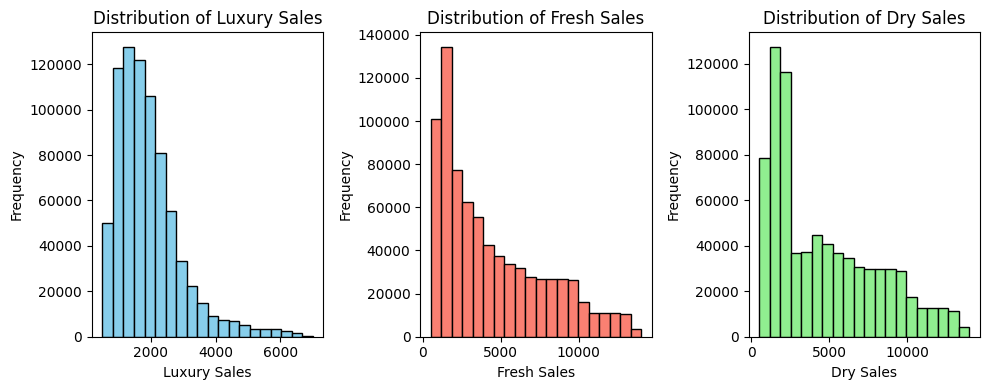

In [40]:
# Summary statistics
summary_stats = train_data.describe()
print("Summary Statistics:")
print(summary_stats)

# Visualize distribution of sales variables using histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
luxury_sales_hist, luxury_sales_bins, _ = plt.hist(train_data['luxury_sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Luxury Sales')
plt.xlabel('Luxury Sales')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
fresh_sales_hist, fresh_sales_bins, _ = plt.hist(train_data['fresh_sales'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Fresh Sales')
plt.xlabel('Fresh Sales')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
dry_sales_hist, dry_sales_bins, _ = plt.hist(train_data['dry_sales'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Dry Sales')
plt.xlabel('Dry Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


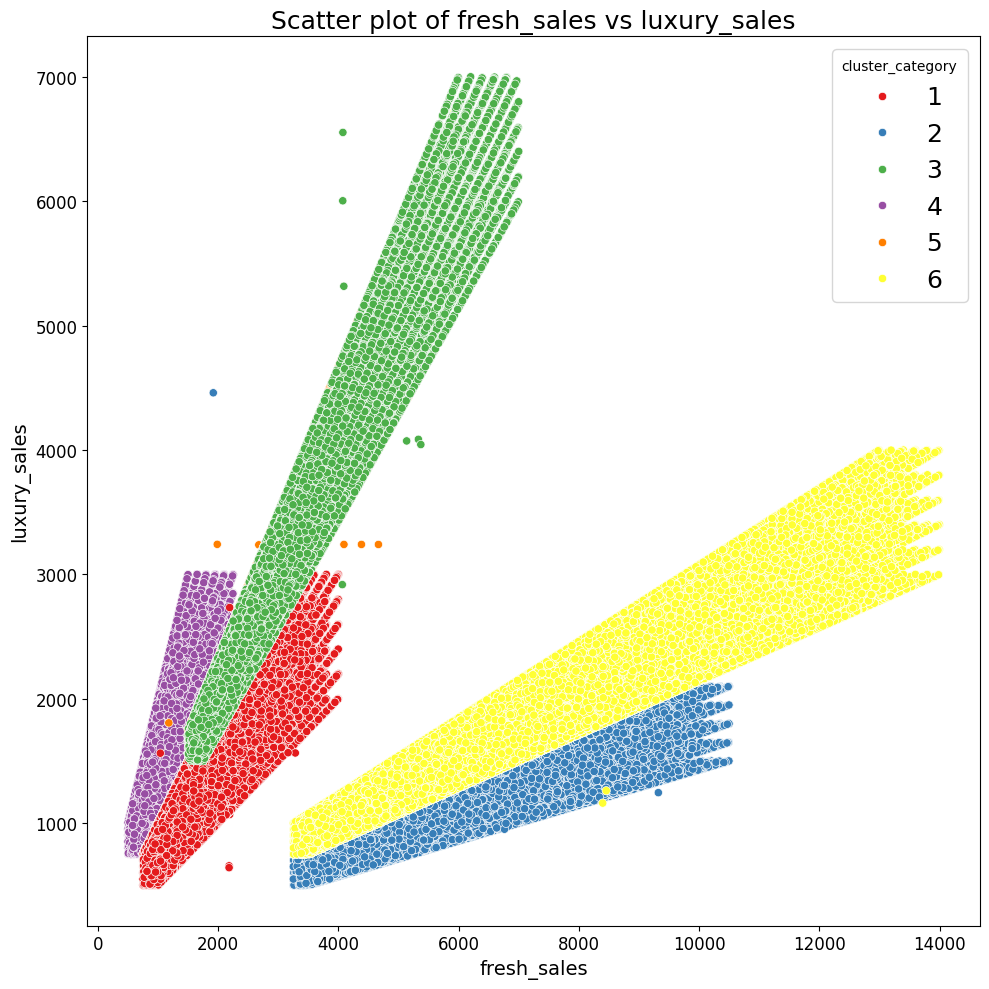

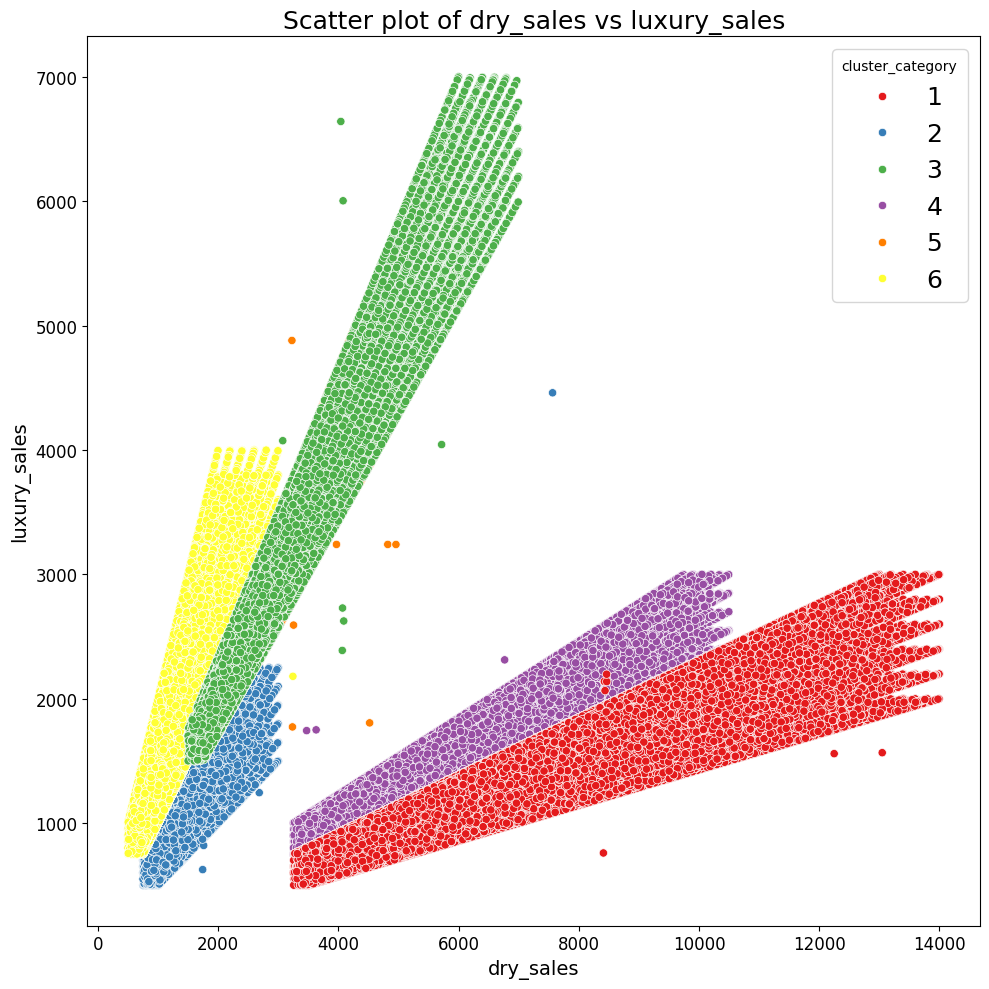

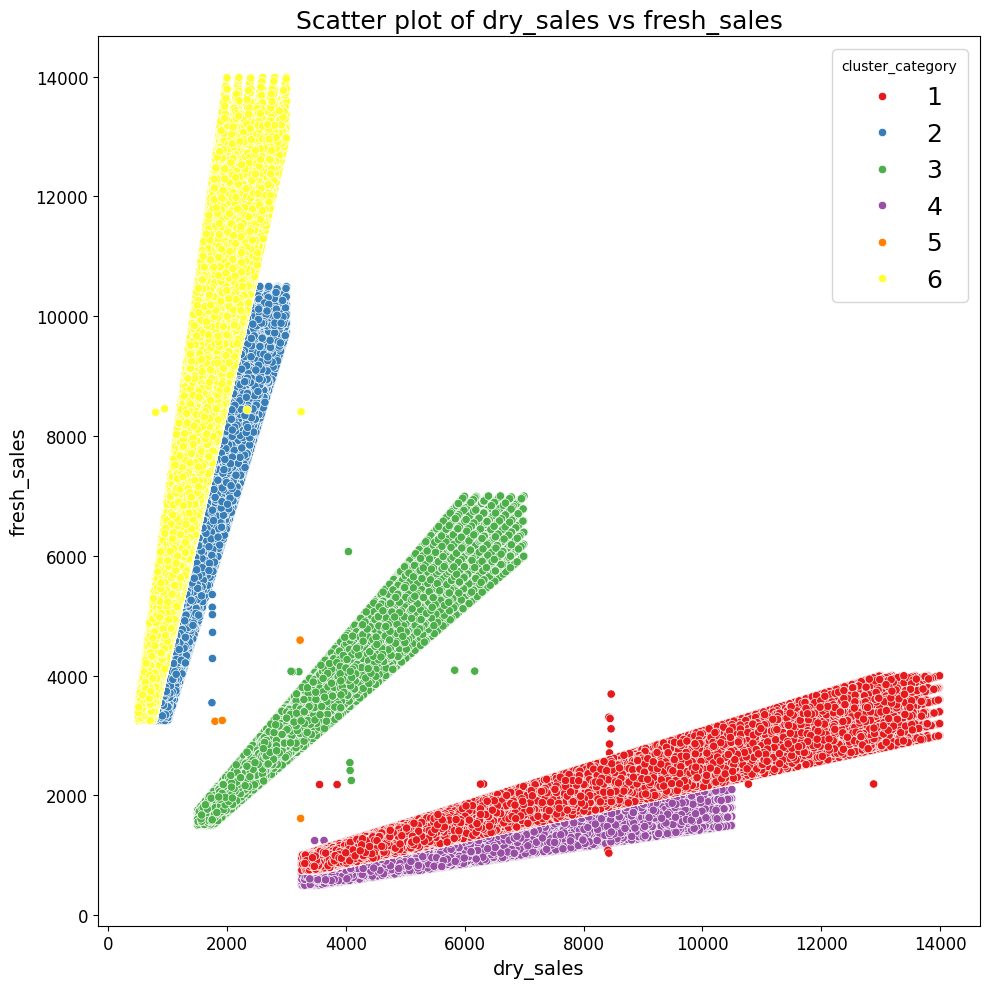

In [41]:
# Drop non-numeric columns
numeric_df = train_data.drop(['Customer_ID', 'outlet_city'], axis=1)
# Specify the three combinations of x and y axes
combinations = [
    ('fresh_sales', 'luxury_sales'),
    ('dry_sales', 'luxury_sales'),
    ('dry_sales', 'fresh_sales')
]

# Set font sizes
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 18
})



# Plot each combination
for i, (x, y) in enumerate(combinations, 1):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=x, y=y, hue='cluster_category', palette='Set1', data=numeric_df)
    plt.title(f'Scatter plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

In [42]:
# Encoding categorical variable 'outlet_city' using one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=['outlet_city'])
scaler = StandardScaler()
numerical_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']

train_data_encoded[numerical_columns] = scaler.fit_transform(train_data_encoded[numerical_columns])

# Convert boolean values to integers (1 for True, 0 for False) for 'outlet_city' columns
outlet_city_columns = [col for col in train_data_encoded.columns if col.startswith('outlet_city_')]
train_data_encoded[outlet_city_columns] = train_data_encoded[outlet_city_columns].astype(int)

# Display the first few rows of the updated dataset
print("Encoded and Scaled Dataset with 1s and 0s:")
train_data_encoded.head()

Encoded and Scaled Dataset with 1s and 0s:


,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_category,outlet_city_outlet_cat_1,outlet_city_outlet_cat_2
0,10493832.0,-0.709489,-1.101376,0.180602,4,1,0
1,10178643.0,-0.330519,-1.010187,0.390354,1,1,0
2,10513916.0,0.365394,-0.883948,1.313813,4,1,0
3,10334589.0,0.351510,-0.806392,1.297458,4,1,0
4,10458365.0,0.421773,-0.707464,1.339762,4,1,0


In [43]:
test_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,outlet_cat_2,2686.50,3582.00,12537.00
1,10089,outlet_cat_2,1717.56,2576.34,9446.58
2,38329,outlet_cat_2,854.04,1242.24,5201.88
3,11376,outlet_cat_2,1638.12,2320.67,9282.68
4,12410,outlet_cat_2,1039.09,1518.67,5435.24


In [44]:
# Encoding categorical variable 'outlet_city' using one-hot encoding
test_data_encoded = pd.get_dummies(test_data, columns=['outlet_city'])

test_data_encoded[numerical_columns] = scaler.fit_transform(test_data_encoded[numerical_columns])
# test_data_encoded.drop['o']
# Convert boolean values to integers (1 for True, 0 for False) for 'outlet_city' columns
outlet_city_columns = [col for col in test_data_encoded.columns if col.startswith('outlet_city_')]
test_data_encoded[outlet_city_columns] = test_data_encoded[outlet_city_columns].astype(int)

# Display the first few rows of the updated dataset
print("Encoded and Scaled Dataset with 1s and 0s:")
test_data_encoded.head()

Encoded and Scaled Dataset with 1s and 0s:


,Customer_ID,luxury_sales,fresh_sales,dry_sales,outlet_city_outlet_cat_1,outlet_city_outlet_cat_2
0,33574,0.756569,-0.257052,2.300097,0,1
1,10089,-0.208718,-0.557303,1.394065,0,1
2,38329,-1.068982,-0.955614,0.149628,0,1
3,11376,-0.287859,-0.633636,1.346014,0,1
4,12410,-0.884630,-0.873082,0.218043,0,1


# 4. Splitting the dataset

In [45]:
# Splitting the data into features (X) and target variable (y)
y = train_data_encoded['cluster_category']
X = train_data_encoded.drop(columns=['cluster_category','Customer_ID'])


# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (619317, 5)
Shape of X_test: (154830, 5)
Shape of y_train: (619317,)
Shape of y_test: (154830,)


# 5. Training the model

In [46]:
# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 6. Evaluating the model


In [47]:
# Predict the target labels for the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100
print("Accuracy (Percentage): {:.2f}%".format(accuracy_percentage))

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9997933217076794
Accuracy (Percentage): 99.98%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     38087
           2       1.00      1.00      1.00     30887
           3       1.00      1.00      1.00      9817
           4       1.00      1.00      1.00     34406
           5       1.00      1.00      1.00      7871
           6       1.00      1.00      1.00     33762

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



# 7. Predicting cluster categories for test data

In [48]:
# Align columns of test data with training data
test_data_encoded_aligned = test_data_encoded.reindex(columns=X.columns, fill_value=0)

# Predict the cluster category for the test data
test_data_encoded['cluster_category'] = rf_classifier.predict(test_data_encoded_aligned)

# Select the 'Customer_ID' and 'cluster_category' columns
submission_df = test_data_encoded[['Customer_ID', 'cluster_category']]

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission DataFrame
print("Submission DataFrame:")
print(submission_df.head())

Submission DataFrame:
   Customer_ID  cluster_category
0        33574                 1
1        10089                 1
2        38329                 1
3        11376                 1
4        12410                 1
